# Part II - Students Skill/Performance Analysis
## by Jessica Chizoba Nkwa

## Investigation Overview


> In this pisa dataset investigation, I looked at the effect of parental background (such degree, income, and occupation status) and student interest toward student academic performance. The main focus was on how many features contribute to student performance in their academics.

## Dataset Overview

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_pisa_data.csv')

## (Visualization 1)

> The most common country with the highest number of students that participated in the survey

 

In [3]:
from typing import Iterable

def count_dplot(cols: Iterable, plottype: sb=sb.countplot, nrows: int=1, ncols=2, usex: bool=True,
                 figsize: tuple=(16, 7), annotr=0, tick_angle=90):
    """
        This function will plot the number of occurences in the given columns using count chart and annotate each bar
        using k to represent thousand.
        The number of the subplots rows is default to 1 while columns is 2, this can be modified using the nrows and ncols attributes.
        usex is default to True and can be represented vertically or horizontally.
    """
    base_color = sb.color_palette()[0]
    fig, ax = plt.subplots(figsize=figsize)
    if usex:
        for i, x in enumerate(cols, 1):
            countv = df[x].value_counts()
            # subplots
            plt.subplot(nrows, ncols, i)
            # Plot chart
            g = plottype(data=df, x=x, color=base_color, order=countv.index) 
            # Capitalizing and bolding the xlabel
            plt.xlabel(g.get_xlabel().replace("_", " ").title(), fontweight='bold') 
            # Rotating xticks
            locs, labels = plt.xticks(rotation=tick_angle) 
            for loc, label in zip(locs, labels):
                # Get the count of each label
                count = countv[label.get_text()] 
                plt.text(loc, count+6e2, f'{round(count/1000, 1)}k',
                         # Annotate each bar with their count using k to denote 1000
                         ha='center', color='black', rotation=annotr) 
            g.set_yticks([])
            for a in ('right', 'left', 'top'):
                # Turn off the chosen spines
                g.spines[a].set_visible(False)
                # To avoid subplot overlapping
        plt.tight_layout() 
    else:
        g = plottype(data=df, y=cols, color=base_color, ax=ax)
        # Annotate all bars
        ax.bar_label(ax.containers[0], label_type='edge', rotation=annotr) 
        

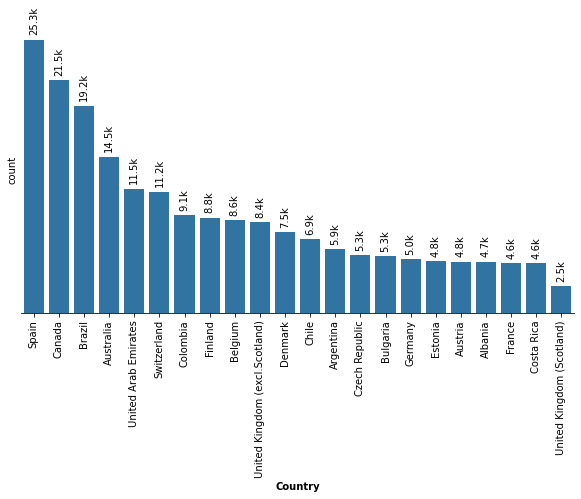

In [4]:
count_dplot(['country'], annotr=90)

From the chart, it shows that Spain, Canada and Brazil are the three top countries that filled out the survey

## (Visualization 2)

> Academic performance on primary education and its effect

In [5]:
def primary_edu_plot(x):
    sb.violinplot(data=df, y='pri_sch', x=x, inner='quartile', palette='Greens')
    plt.ylabel('Attend Primary Education');
    plt.xlabel(x.replace('_', " ").title())

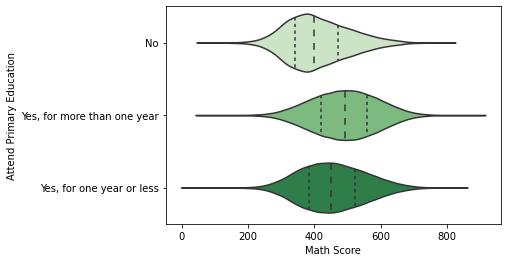

In [6]:
primary_edu_plot('math_score')

There is a significant increase in the scores of student's based on their experience in primary education and its predominant in Mathematics performance.

## (Visualization 3)

> Relationship between all numeric data

<AxesSubplot:>

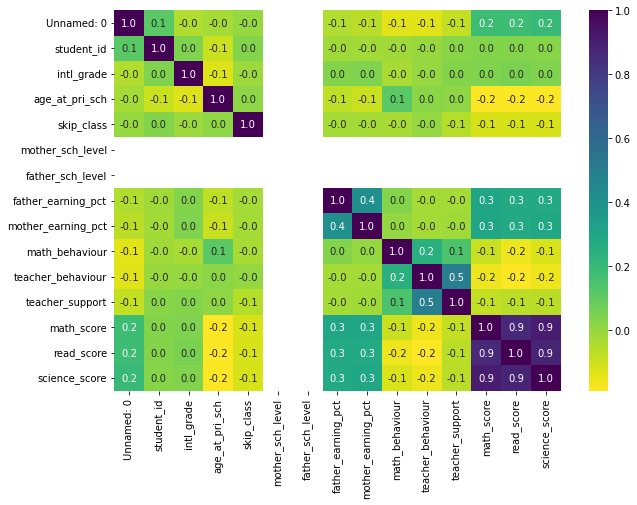

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))
sb.heatmap(df.corr(), cmap='viridis_r', annot=True, fmt='.1f', ax=ax)

## (Visualization 4)

> Effect of students performance based on parental employment status

In [8]:
def parent_emp_inf():
    """
        Student performance determining the Parent employment status 
    """
    fig, axis = plt.subplots(nrows=2, figsize=(7, 9))
    g = sb.violinplot(data=df, y='father_job_status', x='math_score', inner='quartile', palette='Blues', ax=axis[0])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())

    g = sb.boxenplot(data=df, y='mother_job_status', x='read_score', palette='Greens', ax=axis[1])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())
    plt.suptitle('Effect of Parental Job status on Students performance')

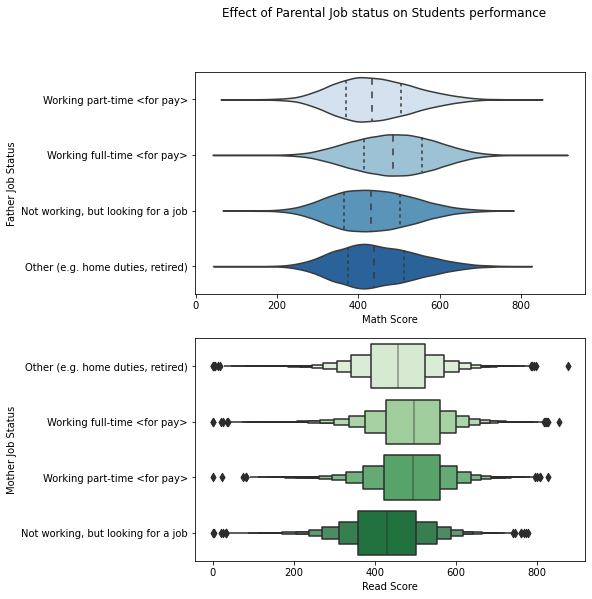

In [9]:
parent_emp_inf()

Students with parents working full-time tend to perform better than students whose parents are looking for job. It is convenient to conclude that parent occupation is related to student performance.

## Conclusion

> When student's basic school foundation is strong, their performance will always be exceptionally high. The study has contributed to the confirmation that children perform better academically when they start up schooling. 


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [13]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 804866 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\EMMANUEL\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\EMMANUEL\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\EMMANUEL\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\EMMANUEL\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\EMMANUEL\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_not

In [11]:
zip -r my_project.zip 

SyntaxError: invalid syntax (2773749174.py, line 1)